<a href="https://colab.research.google.com/github/Teesta-Das/TSF-GRIP-Tasks/blob/main/TSF_Task_2_3_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Name-Teesta Das**
# **#3 of Task 2- Visualisation with Decision Tree Classifier:**

# **Prediction using Decision Tree Algorithm**

### **In this task, we shall create a Decision Tree Classifier and visualise it graphically for the given 'Iris' dataset so that if we feed any new data to this classifier, it would be able to predict the right class accordingly.**

In [ ]:
# We import necessary python libraries for the notebook

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# We upload the csv file and create an instance,say df, to read the dataset

In [ ]:
from google.colab import files 
uploaded=files.upload()

Saving Iris.csv to Iris.csv


In [ ]:
df=pd.read_csv('Iris.csv',header=0)
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
# We make the 'Id' column our index and modify the other columns

In [ ]:
df=pd.read_csv('Iris.csv', header=0, index_col='Id')
df.columns=['Sepal Length in cm','Sepal Width in cm','Petal Length in cm','Petal Width in cm','Species']
df

,Sepal Length in cm,Sepal Width in cm,Petal Length in cm,Petal Width in cm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
146,6.7,3.0,5.2,2.3,Iris-virginica
147,6.3,2.5,5.0,1.9,Iris-virginica
148,6.5,3.0,5.2,2.0,Iris-virginica


In [ ]:
# Now we try to get some basic information about the dataset

In [ ]:
df.shape # Gives the number of rows and columns in the dataset

(150, 5)

In [ ]:
df.columns # Gives all the columns of the dataset

Index(['Sepal Length in cm', 'Sepal Width in cm', 'Petal Length in cm',
       'Petal Width in cm', 'Species'],
      dtype='object')

In [ ]:
df.info() # Gives information about the entire dataset

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 1 to 150
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Sepal Length in cm  150 non-null    float64
 1   Sepal Width in cm   150 non-null    float64
 2   Petal Length in cm  150 non-null    float64
 3   Petal Width in cm   150 non-null    float64
 4   Species             150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


In [ ]:
df.describe() # Gives statistical information about the dataset

,Sepal Length in cm,Sepal Width in cm,Petal Length in cm,Petal Width in cm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## **Data Cleaning:**

In [ ]:
# We check if there are any null values in the dataset
df.isnull().sum()

Sepal Length in cm    0
Sepal Width in cm     0
Petal Length in cm    0
Petal Width in cm     0
Species               0
dtype: int64

Apparently, there are no null values or missing values in the dataset.

In [ ]:
# We check if there are any duplicate values in the dataset
df.duplicated().sum()

3

So we see that there are 3 duplicate values in the dataset.

In [ ]:
# Now we create a new dataframe dtree by removing all duplicate values

In [ ]:
dtree=df.drop_duplicates()
dtree

,Sepal Length in cm,Sepal Width in cm,Petal Length in cm,Petal Width in cm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
146,6.7,3.0,5.2,2.3,Iris-virginica
147,6.3,2.5,5.0,1.9,Iris-virginica
148,6.5,3.0,5.2,2.0,Iris-virginica


In [ ]:
dtree.shape # Gives the number of rows and columns of the modified dataframe

(147, 5)

**From this point on, we shall be working with the modified dataset.**

## **We shall now plot a few graphs to visualise the relationship between the various variables of the dataset:**

In [ ]:
# First we find out how many unique species are there and the no of flowers belonging to each of them

In [ ]:
dtree['Species'].value_counts()

Iris-versicolor    50
Iris-virginica     49
Iris-setosa        48
Name: Species, dtype: int64

So, there are 3 unique classes or species in the dataset.

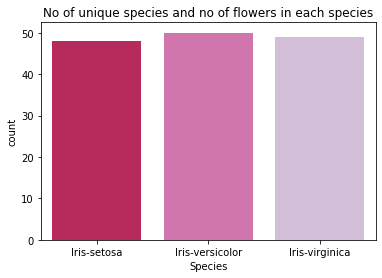

In [ ]:
# We can plot these unique species on a graph
sns.countplot(x=dtree['Species'],palette='PuRd_r')
plt.title('No of unique species and no of flowers in each species')
plt.show()

In [ ]:
# Correlation matrix: Gives the internal relations among the numerical variables of the dataset
dtree.corr()

,Sepal Length in cm,Sepal Width in cm,Petal Length in cm,Petal Width in cm
Sepal Length in cm,1.000000,-0.109321,0.871305,0.817058
Sepal Width in cm,-0.109321,1.000000,-0.421057,-0.356376
Petal Length in cm,0.871305,-0.421057,1.000000,0.961883
Petal Width in cm,0.817058,-0.356376,0.961883,1.000000


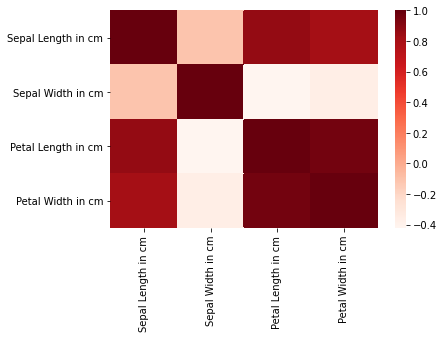

In [ ]:
# We plot a heatmap to represent the correlation matrix
sns.heatmap(dtree.corr(),cmap='Reds')

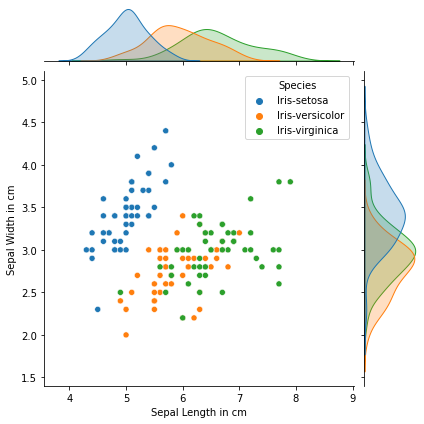

In [ ]:
# We plot a scatterplot to visualise the relation between sepal length and sepal width of the irises with respect to the 3 species
sns.jointplot(x='Sepal Length in cm',y='Sepal Width in cm', data=dtree,hue='Species',kind='scatter')

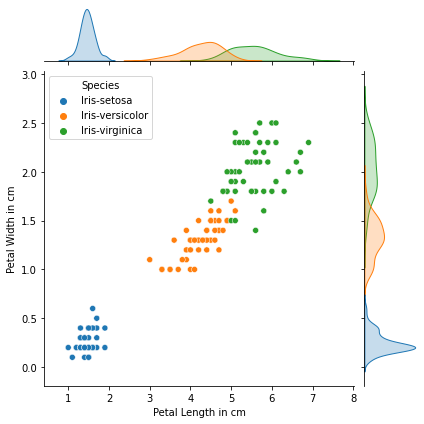

In [ ]:
# We plot a scatterplot to visualise the relation between petal length and petal width of the irises with respect to the 3 species
sns.jointplot(x='Petal Length in cm',y='Petal Width in cm', data=dtree,hue='Species',kind='scatter')

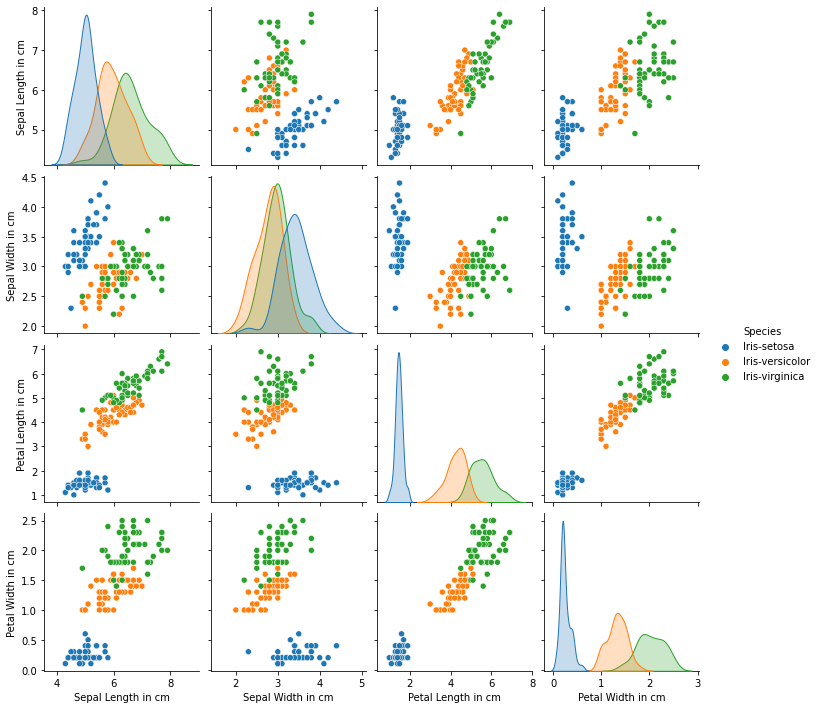

In [ ]:
# We plot the pairwise relationships among the different variables of the dataset with respect to the 3 species using a pairplot 
sns.pairplot(dtree,hue='Species')

## **Preparing the data for building Training and Testing models:**

**We now divide the dataset into two parts- the X part which contains the independent variables(Sepal Length, Sepal Width, Petal Length and Petal Width) and the y part that contains the dependent variable (Species).**

In [ ]:
# We create the X part as a dataframe and diaplay the first five rows
X=dtree.drop('Species',axis=1)
X.head()

,Sepal Length in cm,Sepal Width in cm,Petal Length in cm,Petal Width in cm
Id,,,,
1,5.1,3.5,1.4,0.2
2,4.9,3.0,1.4,0.2
3,4.7,3.2,1.3,0.2
4,4.6,3.1,1.5,0.2
5,5.0,3.6,1.4,0.2


In [ ]:
X.shape # Gives the no of rows and columns of X

(147, 4)

In [ ]:
# We create the y part as a dataframe and diaplay the first five rows
y=dtree[['Species']]
y.head()

,Species
Id,
1,Iris-setosa
2,Iris-setosa
3,Iris-setosa
4,Iris-setosa
5,Iris-setosa


In [ ]:
y.shape # Gives the no of rows and columns of y

(147, 1)

**Now we import the train_test_split() function with the help of sklearn library in order to further sub-divide the X and y data into training and testing sets.**

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=0)

## **Training the Model:**

### **We define the Decision Tree Algorithm.**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
clftree=DecisionTreeClassifier()
clftree.fit(X_train,y_train)
print('Training is complete')

Training is complete


## **Visualising the Decision Tree:**

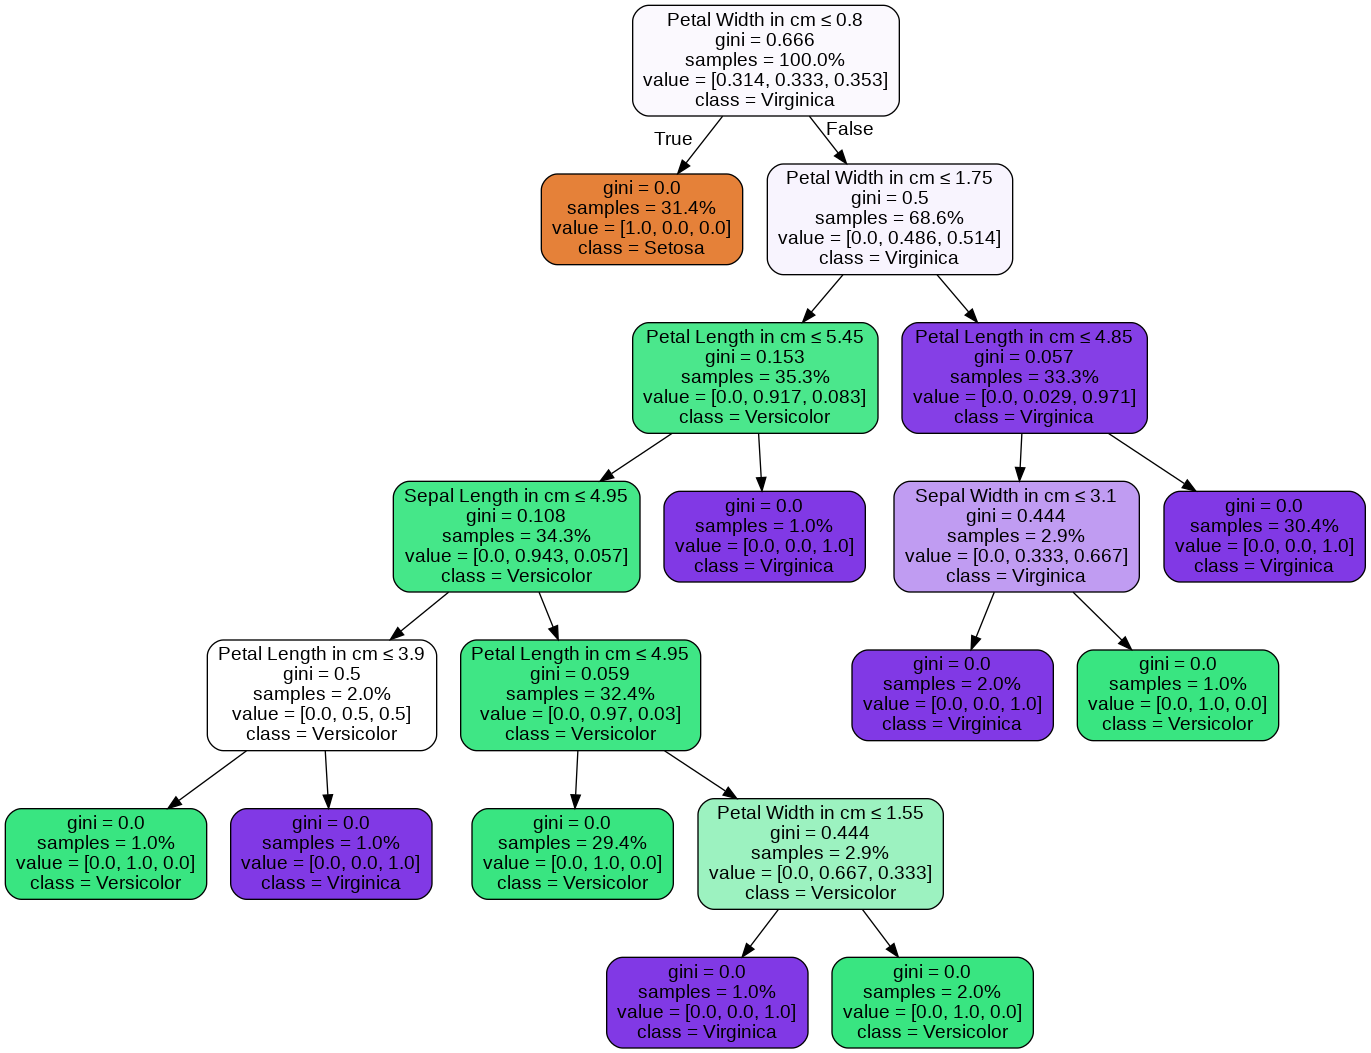

In [ ]:
from sklearn.tree import export_graphviz
dot_data=export_graphviz(clftree,out_file=None,filled=True,rounded=True,special_characters=True,proportion=True,                       
          feature_names=['Sepal Length in cm','Sepal Width in cm','Petal Length in cm','Petal Width in cm'],
          class_names=['Setosa','Versicolor','Virginica'])
from IPython.display import Image
import pydotplus
graph= pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

## **Evaluation of the Model and Predictions:**


### **We can now evaluate the model and proceed to making some predictions since we are done with training our model and visualising the tree.**

In [ ]:
# predictions for the train data set
y_train_pred=clftree.predict(X_train) 

In [ ]:
# predictions for the test data set
y_test_pred=clftree.predict(X_test)

In [ ]:
# We calculate the accuracy of the model

In [ ]:
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test,y_test_pred)
print('The accuracy of this decision tree model is around {} %'.format(accuracy*100))

The accuracy of this decision tree model is around 100.0 %


In [ ]:
# We import and creat confusion matrices for train and test data

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
# Confusion matrix for the training data
confusion_matrix(y_train,y_train_pred)

array([[32,  0,  0],
       [ 0, 34,  0],
       [ 0,  0, 36]])

In [ ]:
# We plot a heatmap for the training data confusion matrix

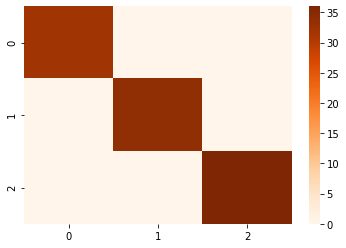

In [ ]:
sns.heatmap(confusion_matrix(y_train,y_train_pred),cmap='Oranges')

In [ ]:
# Confusion matrix for the testing data
confusion_matrix(y_test,y_test_pred)

array([[16,  0,  0],
       [ 0, 16,  0],
       [ 0,  0, 13]])

In [ ]:
# We plot a heatmap for the test data confusion matrix

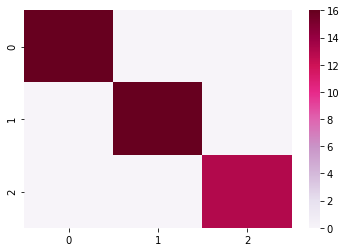

In [ ]:
sns.heatmap(confusion_matrix(y_test,y_test_pred),cmap='PuRd')

### **Let us feed some data into the classifier and see if it can predict the right class-**

In [ ]:
print('Call the function IrisModel')
print('Enter the sepal length,sepal width, petal length and petal width of an iris to predict which class it belongs to')
def IrisModel(sl,sw,pl,pw):
  feeddata=np.array([[sl,sw,pl,pw]])
  prediction=clftree.predict(feeddata)
  print('The given iris belongs to the class {}'.format(prediction.item()))


Call the function IrisModel
Enter the sepal length,sepal width, petal length and petal width of an iris to predict which class it belongs to


In [ ]:
IrisModel(7.6,3.2,6.5,2.1)

The given iris belongs to the class Iris-virginica


In [ ]:
IrisModel(4.7,4.1,1.2,0.6)

The given iris belongs to the class Iris-setosa


In [ ]:
IrisModel(5.5,2.1,4.4,1.7)

The given iris belongs to the class Iris-versicolor


**Thus, we see that our Decision Tree Classifier works just fine.**

## **Hence,we have successfully created the required Decision Tree Classifier.**